# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

# Виды масштабирования признаков

![img/normalization.png](img/normalization.png)

### MinMaxScaler  

$$\large X_{norm} = \frac{X – X_{min}}{X_{max}-X_{min}}$$

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 1.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

### Стандартизация  

$$\large X_{norm} = \frac{X – X_{mean}}{std}$$

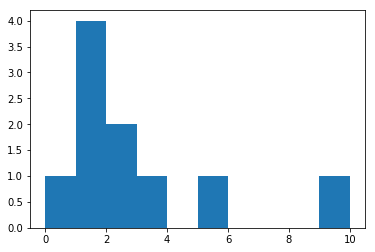

In [9]:
plt.hist(X[1]);

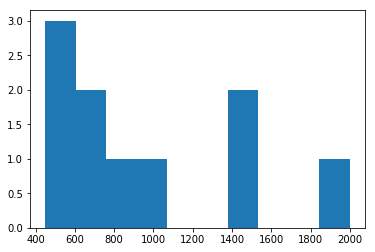

In [10]:
plt.hist(X[2]);

In [11]:
X1_mean = X[1].mean()
X1_mean

2.6

In [12]:
X1_std = X[1].std()
X1_std

2.8000000000000003

In [13]:
X_st = X.copy().astype(np.float64)

In [14]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-5.71428571e-01, -5.71428571e-01, -2.14285714e-01,
        -5.71428571e-01,  1.42857143e-01, -9.28571429e-01,
         8.57142857e-01,  2.64285714e+00, -5.71428571e-01,
        -2.14285714e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

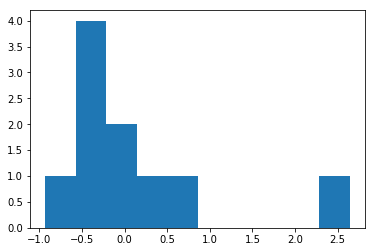

In [15]:
plt.hist(X_st[1]);

In [16]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [17]:
X_st[2] = custom_StandardScaler(X[2])

In [18]:
X_st[3] = custom_StandardScaler(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

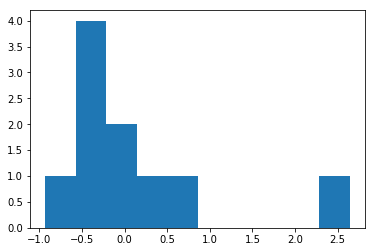

In [19]:
plt.hist(X_st[1]);

# SGD

![img/lr_gradient_descent.gif](img/lr_gradient_descent.gif)

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [20]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [21]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [22]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

# итерация: 100, MSE: 102.59862104810296, веса: [49.68215931  3.97686589  2.91001163  4.73203529]
# итерация: 200, MSE: 41.37212150229183, веса: [56.3764634   4.42994791  2.6890995   4.53507968]
# итерация: 300, MSE: 40.117764693339, веса: [57.26425903  4.77692261  2.49182318  4.38717839]
# итерация: 400, MSE: 39.984590955287516, веса: [57.38199809  5.0499436   2.3244432   4.28305842]
# итерация: 500, MSE: 39.911973272857935, веса: [57.3976126   5.26535003  2.18270191  4.21074868]
# итерация: 600, MSE: 39.86578518389816, веса: [57.39968338  5.43574324  2.06285479  4.16139895]
# итерация: 700, MSE: 39.83598119531598, веса: [57.39995801  5.57088308  1.96165569  4.12850587]
# итерация: 800, MSE: 39.81656174701994, веса: [57.39999443  5.67834458  1.87630407  4.1073075 ]
# итерация: 900, MSE: 39.803794696813206, веса: [57.39999926  5.7640199   1.80439361  4.09433147]
# итерация: 1000, MSE: 39.79533194421218, веса: [57.3999999   5.8325026   1.74386382  4.0870581 ]


array([57.3999999 ,  5.8325026 ,  1.74386382,  4.0870581 ])

In [23]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [24]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация: 500, MSE: 41.766836434831845, веса: [57.39672079  4.93590154  2.83781525  3.90430702]
# итерация: 1000, MSE: 39.7993488972972, веса: [57.39831394  5.70402419  2.00325475  3.9774104 ]
# итерация: 1500, MSE: 38.9291627833565, веса: [57.39799202  5.97745597  1.65889229  4.05145933]
# итерация: 2000, MSE: 38.551856232581834, веса: [57.39786911  6.07910071  1.51777476  4.09229533]
# итерация: 2500, MSE: 38.39201416050441, веса: [57.39782113  6.11808059  1.46017939  4.11148775]
# итерация: 3000, MSE: 38.32540312419313, веса: [57.39780213  6.13334611  1.43672883  4.11991266]
# итерация: 3500, MSE: 38.29793257501143, веса: [57.39779453  6.13940605  1.42719428  4.123486  ]
# итерация: 4000, MSE: 38.286676301393946, веса: [57.39779147  6.14183221  1.42332101  4.1249735 ]
# итерация: 4500, MSE: 38.282082001473555, веса: [57.39779024  6.14280866  1.42174835  4.12558619]
# итерация: 5000, MSE: 38.28021126725226, веса: [57.39778974  6.1432029   1.42111     4.125837  ]


array([57.39778974,  6.1432029 ,  1.42111   ,  4.125837  ])

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [25]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [26]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

# итерация: 500, MSE: 39.98166412253417, веса: [57.39479705  5.10767868  2.46037345  4.08674902]
# итерация: 1000, MSE: 39.80723120406399, веса: [57.39713005  5.765859    1.85689028  4.03893236]
# итерация: 1500, MSE: 39.78240504280036, веса: [57.39713014  5.99060723  1.60529698  4.06885866]
# итерация: 2000, MSE: 39.778523565788916, веса: [57.39713014  6.07152025  1.50155606  4.09300748]
# итерация: 2500, MSE: 39.777887486171274, веса: [57.39713014  6.10185559  1.45905205  4.10572941]
# итерация: 3000, MSE: 39.77777930470262, веса: [57.39713014  6.11355928  1.44170275  4.11160375]
# итерация: 3500, MSE: 39.77775983405892, веса: [57.39713014  6.11816175  1.43463681  4.11416107]
# итерация: 4000, MSE: 39.77775594321602, веса: [57.39713014  6.11999396  1.43176283  4.1152412 ]
# итерация: 4500, MSE: 39.777755024514185, веса: [57.39713014  6.12072893  1.43059479  4.11568989]
# итерация: 5000, MSE: 39.77775476050768, веса: [57.39713014  6.12102515  1.4301203   4.11587451]


array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

### Домашнее задание:  
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

**1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).**

In [27]:
powers = [10**(-i) for i in range(-2, 6)]

In [28]:
weights = np.array(list(map(lambda i : eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=i), powers)))

# итерация: 500, MSE: 3319.883623678966, веса: [1.1254902  0.20774643 0.20104868 0.2018609 ]
# итерация: 1000, MSE: 3319.883623678966, веса: [1.1254902  0.20774643 0.20104868 0.2018609 ]
# итерация: 1500, MSE: 3319.883623678966, веса: [1.1254902  0.20774643 0.20104868 0.2018609 ]
# итерация: 2000, MSE: 3319.883623678966, веса: [1.1254902  0.20774643 0.20104868 0.2018609 ]
# итерация: 2500, MSE: 3319.883623678966, веса: [1.1254902  0.20774643 0.20104868 0.2018609 ]
# итерация: 3000, MSE: 3319.883623678966, веса: [1.1254902  0.20774643 0.20104868 0.2018609 ]
# итерация: 3500, MSE: 3319.883623678966, веса: [1.1254902  0.20774643 0.20104868 0.2018609 ]
# итерация: 4000, MSE: 3319.883623678966, веса: [1.1254902  0.20774643 0.20104868 0.2018609 ]
# итерация: 4500, MSE: 3319.883623678966, веса: [1.1254902  0.20774643 0.20104868 0.2018609 ]
# итерация: 5000, MSE: 3319.883623678966, веса: [1.1254902  0.20774643 0.20104868 0.2018609 ]
# итерация: 500, MSE: 2380.6100686583386, веса: [9.56666667 1

Text(0, 0.5, 'weights')

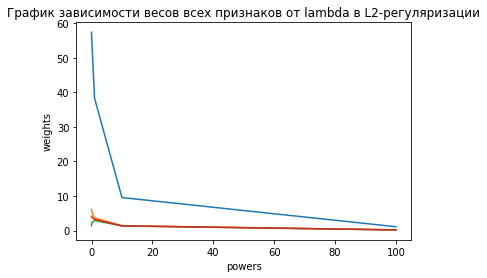

In [29]:
%matplotlib inline

plt.plot(powers, weights)
plt.title('График зависимости весов всех признаков от lambda в L2-регуляризации')
plt.xlabel('powers')
plt.ylabel('weights')

In [30]:
weights

array([[ 1.1254902 ,  0.20774643,  0.20104868,  0.2018609 ],
       [ 9.56666667,  1.42530532,  1.35226504,  1.37037873],
       [38.26666667,  3.66557478,  2.94352608,  3.25219037],
       [54.66666667,  5.3118901 ,  2.25660813,  3.88109191],
       [57.11442786,  6.0088442 ,  1.55430443,  4.08144793],
       [57.37131434,  6.11038803,  1.44200443,  4.11257825],
       [57.39713014,  6.12102515,  1.4301203 ,  4.11587451],
       [57.399713  ,  6.12209394,  1.42892499,  4.11620609]])

In [31]:
weights.shape

(8, 4)

**2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?**

Ответ:

Нормализация признаков применяется в метрических методах, чтобы они (значения признаков) вносили одинаковый вклад.

Стандартизация признаков применяется в линейных моделях, потому что одно из наиболее важных допущений при работе с линейными моделями, параметры которых оцениваются методом наименьших квадратов, состоит в том, что остатки модели независимы (т.е. не коррелируют) и имеют нормальное распределение со средним значением 0 и некоторым фиксированным стандартным отклонением σϵσϵ, т.е. ϵ_i∼N(0,σ).

В итоге, применить и нормализацию, и стандартизацию, наверное можно, при условии, что внезапно, в процессе преобразования на преобразование, не возникнет где-то деления на ноль (не проверял пока). Только как-то не приходит в голову случай (пример), когда и зачем это может понадобится.

**3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.**

In [32]:
# возьмем производную от модуля wj: |wj|' = (sqrt(wj**2))' = wj/abs(wj)
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1 / n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W / np.abs(W)) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [33]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

# итерация: 500, MSE: 39.9815492692797, веса: [57.3976156   5.1079242   2.46011903  4.08691798]
# итерация: 1000, MSE: 39.80712300604174, веса: [57.3999499   5.76651203  1.85620907  4.03912572]
# итерация: 1500, MSE: 39.78234087113101, веса: [57.39995     5.99151699  1.60431305  4.06910179]
# итерация: 2000, MSE: 39.77848915615645, веса: [57.39995     6.07256443  1.50039558  4.09329499]
# итерация: 2500, MSE: 39.77786776237368, веса: [57.39995     6.10296578  1.45779797  4.10604572]
# итерация: 3000, MSE: 39.7777660764615, веса: [57.39995     6.11470092  1.44040178  4.11193613]
# итерация: 3500, MSE: 39.777749346503995, веса: [57.39995    6.1193181  1.4333132  4.1145017]
# итерация: 4000, MSE: 39.77774658745511, веса: [57.39995     6.12115708  1.43042856  4.11558584]
# итерация: 4500, MSE: 39.77774613157808, веса: [57.39995     6.12189515  1.42925561  4.11603642]
# итерация: 5000, MSE: 39.77774605600939, веса: [57.39995     6.12219276  1.42877888  4.11622191]


array([57.39995   ,  6.12219276,  1.42877888,  4.11622191])